# Companies and Chocostats

In this notebook I will explore the data contained into the [Chocolate Bar Ratings](https://www.kaggle.com/rtatman/chocolate-bar-ratings) dataset. 

Firstly, I will compute the statistics regarding the companies, and then regarding the chocolate and the chocolate types.

### Preliminary setup

To begin, import the needed libraries, load the dataset and fix it a little

In [1]:
import os
import webbrowser

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
dataset_path = os.path.join(os.getcwd(), "../data/flavors_of_cacao.csv")
chocodata = pd.read_csv(dataset_path)

# Rename the columns to better manage them
new_colnames = ['company', 'bean_origin', 'ref', 'review_date', 'cocoa_percent',
                'company_location', 'rating', 'bean_type', 'bean_origin']
chocodata = chocodata.rename(columns=dict(zip(chocodata.columns, new_colnames)))

### Companies

In [3]:
# Get a list of all the unique values of the company column (that are overall 416)
companies = chocodata.company.unique()

# Get a list of all the unique values of the company_location column (that are overall 60)
countries = chocodata.company_location.unique()

#### Computing the ten better companies in terms of average grades

In [4]:
# Create a dataframe in which to save the companies and their average evaluations
d = {'company': [],
     'avg_rating': []}
avg_companies = pd.DataFrame(d)

# Foreach company save its average evaluation in a dataframe
for c in companies:
    company = chocodata[chocodata.company == c]
    mean_rating = company['rating'].mean()
    d = pd.DataFrame(
        {'company': [c],
         'avg_rating': [mean_rating]})
    tmp = [avg_companies, d]
    avg_companies = pd.concat(tmp)

# Extract the ten better companies in term of average chocolate rating
ten_better_companies = avg_companies.nlargest(10, columns=['avg_rating'])

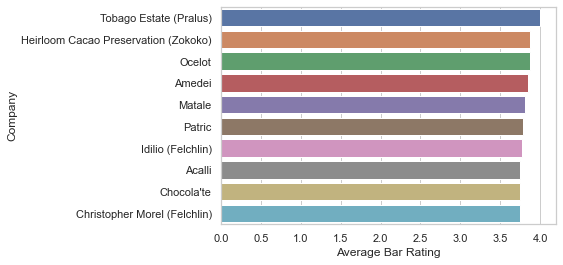

In [5]:
# Plot them through a horizontal barplot
sns.set_theme(style='whitegrid')

ax = sns.barplot(data=ten_better_companies, x='avg_rating', y='company')
ax.set(xlabel='Average Bar Rating', ylabel='Company')

plt.savefig('images/best_companies.pdf')

#### Computing the best company for each country of the database

TODO: this does not work as it should; I need to find a way to clear the ```avg_companies``` DataFrame before the following execution of the outer ```for``` loop.

The problem is that, not cleaning up the ```avg_companies``` DataFrame, it continously keeps all the companies, saving them the higher among all (and not among only the ones of the actual country). 

In [9]:
# Create a dataframe in which to save the best company for each country
d = {'country': [],
     'best_company': [],
     'avg_rating': []}
loc_companies = pd.DataFrame(d)

# Foreach country save its companies
for c in countries:
    companies_country = chocodata.loc[chocodata['company_location'] == c]
    # Create a dataframe in which to save the companies and their average evaluations
    d = {'company': [],
         'avg_rating': []}
    avg_companies = pd.DataFrame(d)
    # Foreach company in country c, compute the average rating of its bars
    for comp in companies_country.company:
        # Compute the average rating for company comp of country c
        company = companies_country[companies_country.company == comp]
        mean_rating = company['rating'].mean()
        # Insert that company and its average rating inside the avg_companies dataframe
        d = pd.DataFrame(
            {'company': [comp],
             'avg_rating': [mean_rating]})
        tmp = [avg_companies, d]
        avg_companies = pd.concat(tmp)
    # Extract the best company for country c
    best_company = avg_companies.nlargest(1, ['avg_rating'])
    # Insert the company in the dataframe
    d = pd.DataFrame(
            {'country': [c],
             'best_company': [best_company['company'].values[0]],
             'avg_rating': [best_company['avg_rating'].values[0]]})
    tmp = [loc_companies, d]
    loc_companies = pd.concat(tmp)

loc_companies.sort_values('country')

,country,best_company,avg_rating
0,Amsterdam,Chocolate Makers,3.500000
0,Argentina,Salgado,3.500000
0,Australia,Matale,3.812500
0,Austria,Zotter,3.308824
0,Belgium,Benoit Nihant,3.708333
0,Bolivia,El Ceibo,3.250000
0,Brazil,Mission,3.625000
0,Canada,Christopher Morel (Felchlin),3.750000
0,Chile,Obolo,3.750000
0,Colombia,Cacao Hunters,3.464286


### ChocoStats